<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/04_modeling_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/analytic.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/populations.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/babyboom.dat")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/PEP_2012_PEPANNRES_with_ann.csv")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded analytic.py
Downloaded first.py
Downloaded brfss.py
Downloaded populations.py
Downloaded hinc.py
Downloaded babyboom.dat
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz
Downloaded CDBRFS08.ASC.gz
Downloaded PEP_2012_PEPANNRES_with_ann.csv
Downloaded hinc06.csv


In [15]:
from collections import Counter

import numpy as np
import pandas as pd

import nsfg
import brfss
import first
import thinkstats2
import thinkplot

import analytic

##Exponential distribution

Here's what the exponential CDF looks like with a range of parameters.

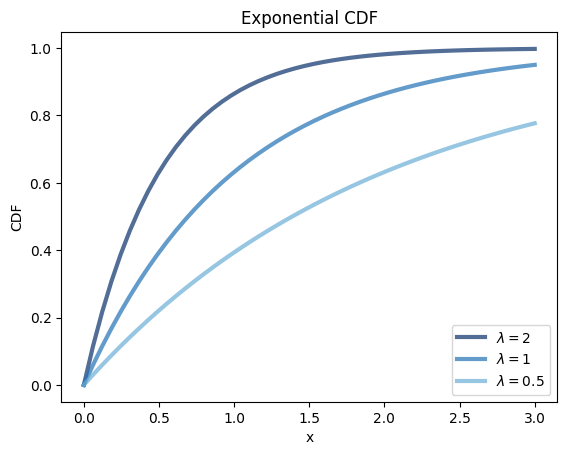

In [5]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
  xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
  label = r"$\lambda=%g$" % lam
  thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Exponential CDF", xlabel="x", ylabel="CDF", loc="lower right")

Here's the distribution of interarrival times from a dataset of birth times.

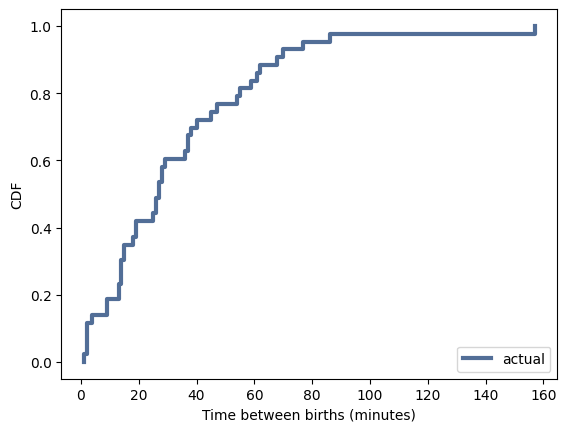

In [6]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()       # difference between consecutive birth times
cdf = thinkstats2.Cdf(diffs, label="actual") # distribution of these interarrival times

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CDF")

Here's what the CCDF looks like on a log-y scale. A straight line is consistent with an exponential distribution.

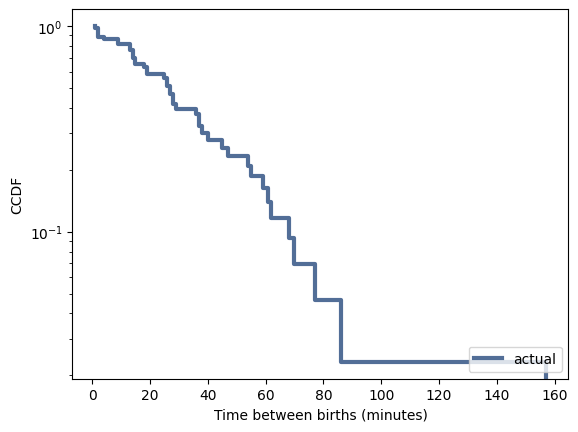

In [7]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel="Time between births (minutes)", ylabel="CCDF", yscale="log", loc="lower right")

It is not exactly straight, which indicates that the
exponential distribution is not a perfect model for this data. Most likely the underlying
assumption—that a birth is equally likely at any time of day—is not exactly true.

Nevertheless, it might be reasonable to model this dataset with an exponential distribution.

In this example, 44 babies are born in 24 hours, so the rate
is `λ = 0.0306` births per minute. The mean of an exponential distribution is `1 / λ`, so the
mean time between births is 32.7 minutes.

##Normal Distribution

Here's what the normal CDF looks like with a range of parameters.

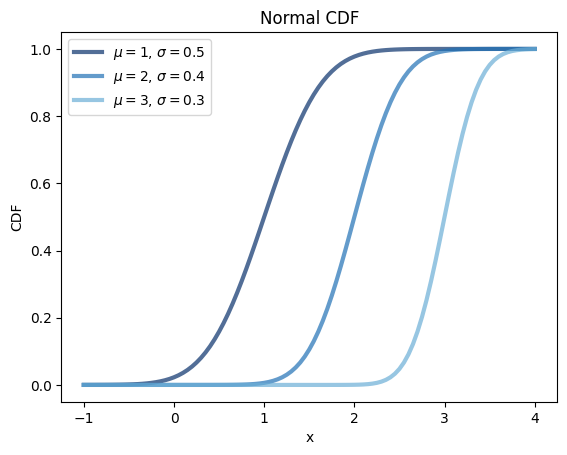

In [8]:
thinkplot.PrePlot(3)

mu = [1.0, 2.0, 3.0]
sigma = [0.5, 0.4, 0.3]
for m, s in zip(mu, sigma):
  xs, ps = thinkstats2.RenderNormalCdf(mu=m, sigma=s, low=-1.0, high=4.0)
  label=r"$\mu=%g$, $\sigma=%g$" % (m, s)
  thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

I'll use a normal model to fit the distribution of birth weights from the NSFG.

In [9]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

Here's the observed CDF and the model. The model fits the data well except in the left tail.

Mean, Var : 7.280883100022579, 1.5452125703544897
Sigma: 1.2430657948614343


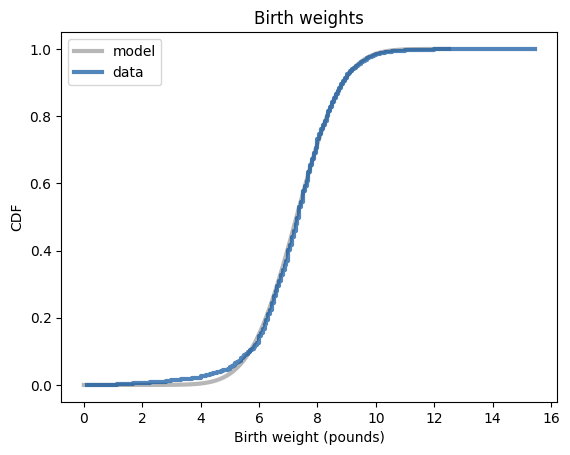

In [10]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print(f"Mean, Var : {mu}, {var}")

# plot the model
sigma = np.sqrt(var)
print(f"Sigma: {sigma}")

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)
thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(weights, label="data")
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Birth weights", xlabel="Birth weight (pounds)", ylabel="CDF")

##Normal Probability Plot

A normal probability plot is a visual test for normality. The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

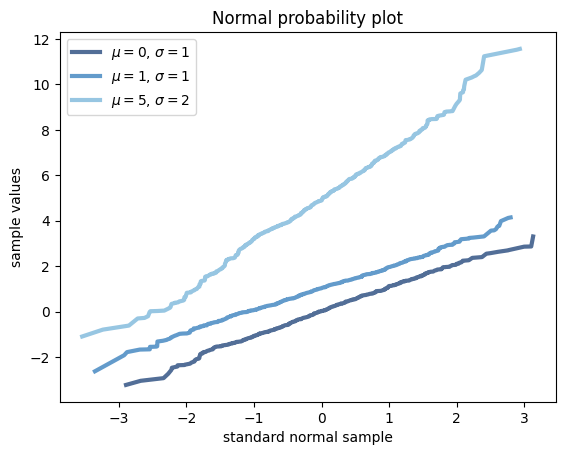

In [11]:
n =1000
thinkplot.PrePlot(3)

mu = [0, 1, 5]
sigma = [1, 1, 2]

for m, s in zip(mu, sigma):
  sample = np.random.normal(m, s, n)
  xs, ys = thinkstats2.NormalProbability(sample)
  label = "$\mu=%d$, $\sigma=%d$" % (m, s)
  thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title="Normal probability plot", xlabel="standard normal sample", ylabel="sample values")

Here's the normal probability plot for birth weights, showing that the lightest babies are lighter than we expect from the normal mode, and the heaviest babies are heavier.

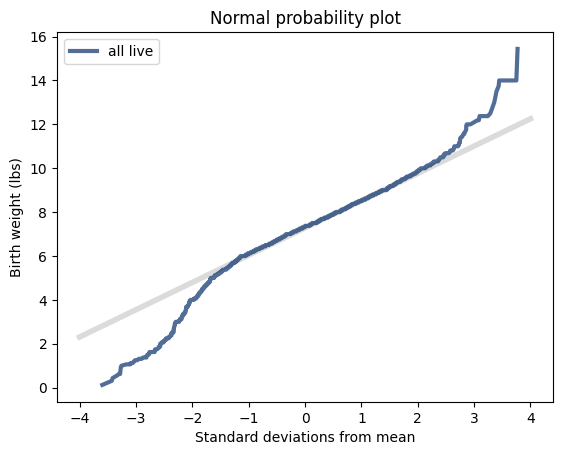

In [12]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

thinkplot.Config(title="Normal probability plot", xlabel="Standard deviations from mean", ylabel="Birth weight (lbs)")

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [13]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

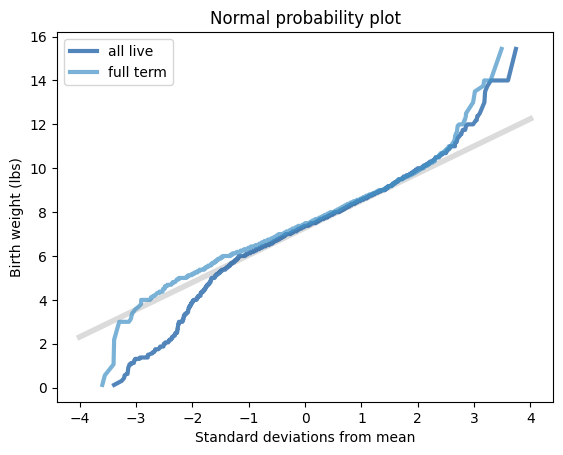

In [14]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label="all live")

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label="full term")

thinkplot.Config(title="Normal probability plot", xlabel="Standard deviations from mean", ylabel="Birth weight (lbs)")

##Log-normal Distribution

As an example of a lognormal disrtribution, we'll look at adult weights from the BRFSS.

In [16]:
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [17]:
def make_normal_model(weights):
  """
  Plots a CDF with a Normal model.
  weights: sequence
  """
  cdf = thinkstats2.Cdf(weights, label="weights")
  mean, var = thinkstats2.TrimmedMeanVar(weights)
  std = np.sqrt(var)
  print(f"n: {len(weights)}, mean: {mean}, var: {var}")

  xmin = mean - 4 * std
  xmax = mean + 4 * std

  xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
  thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
  thinkplot.Cdf(cdf)

Here's the distribution of adult weights and a normal model, which is not a very good fit.

n: 398484, mean: 78.59599565702814, var: 315.2242300586199


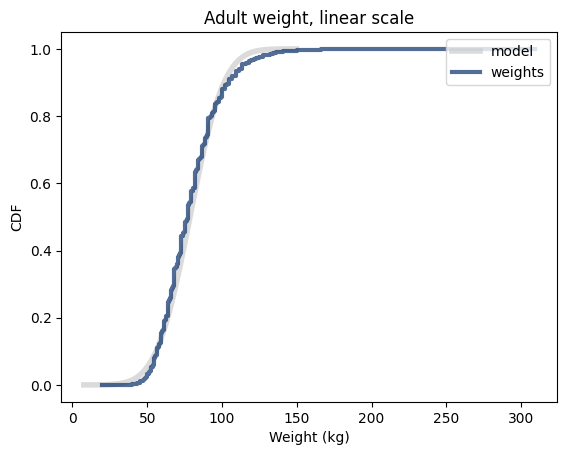

In [18]:
make_normal_model(weights)
thinkplot.Config(title="Adult weight, linear scale", xlabel="Weight (kg)", ylabel="CDF", loc="upper right")

Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale.

The model is a better fit for the data, although the heaviest people are heavier than the model expects.

n: 398484, mean: 1.884660713731975, var: 0.009261329700432872


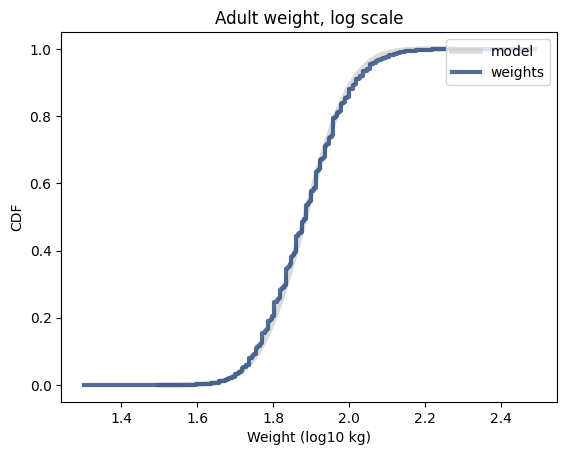

In [19]:
log_weights = np.log10(weights)
make_normal_model(log_weights)
thinkplot.Config(title="Adult weight, log scale", xlabel="Weight (log10 kg)", ylabel="CDF", loc="upper right")

The following function generates a normal probability plot.

In [20]:
def make_normal_plot(weights):
  """
  Generates a normal probability plot of birth weights.
  weights: sequence
  """
  mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
  std = np.sqrt(var)

  xs = [-5, 5]
  xs, ys = thinkstats2.FitLine(xs, mean, std)
  thinkplot.Plot(xs, ys, color="0.8", label="model")

  xs, ps = thinkstats2.NormalProbability(weights)
  thinkplot.Plot(xs, ps, label="weights")

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

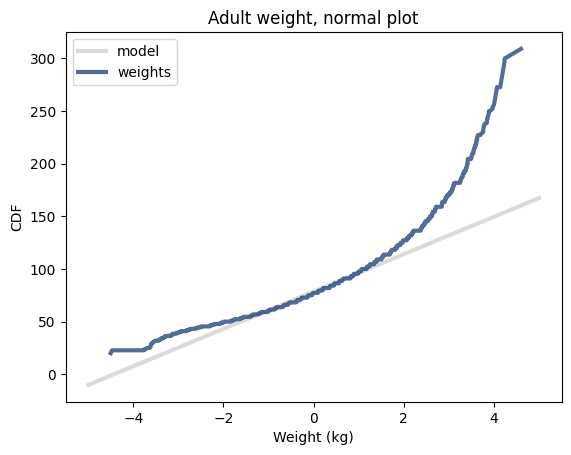

In [21]:
make_normal_plot(weights)
thinkplot.Config(title="Adult weight, normal plot", xlabel="Weight (kg)", ylabel="CDF", loc="upper left")

If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

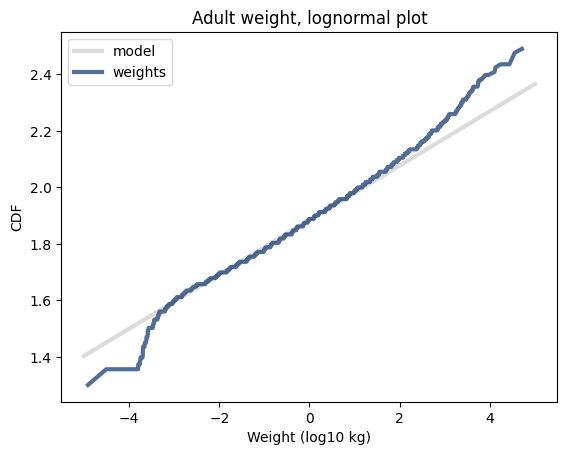

In [23]:
make_normal_plot(log_weights)
thinkplot.Config(title="Adult weight, lognormal plot", xlabel="Weight (log10 kg)", ylabel="CDF", loc="upper left")

##Pareto distribution

In general, CDFs are a good way to visualize distributions. They are not as noisy as PMFs, and if you plot several CDFs on the same axes, any differences between them are apparent.

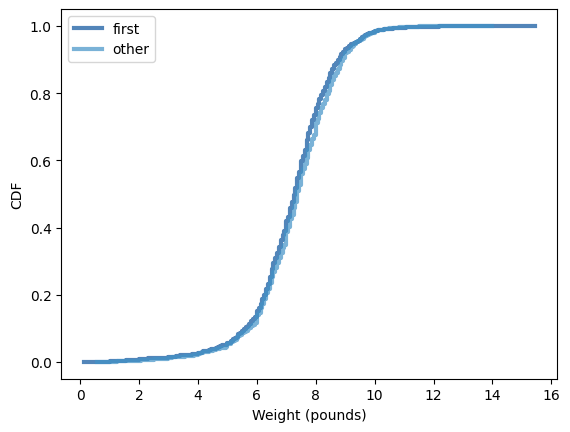

In [ ]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label="first")
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label="other")

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel="Weight (pounds)", ylabel="CDF")

##Percentile-Based Statistics

In [ ]:
# We can use the CDF of birth weight to compute percentile-based statistics.
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label="live")

In [ ]:
# Again, the median is the 50th percentile.
median = live_cdf.Percentile(50)
median

7.375

In [ ]:
# The interquartile range is the interval from the 25th to 75th percentile.
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

We can use the CDF to look up the percentile rank of a particular value.

For example, my second daughter was 10.2 pounds at birth, which is near the 99th percentile.

In [ ]:
live_cdf.PercentileRank(10.2)

98.82717415357381

##Random Numbers

If we draw a random sample from the observed weights and map each weigh to its percentile rank.

In [ ]:
sample = np.random.choice(weights, 100, replace=True)
rank = [live_cdf.PercentileRank(x) for x in sample]

The resulting list of ranks should be approximately uniform from 0-1.

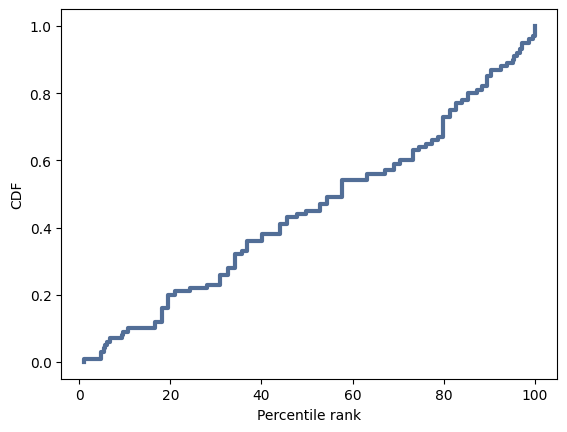

In [ ]:
rank_cdf = thinkstats2.Cdf(rank)

thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel="Percentile rank", ylabel="CDF")

The CDF is approximately a straight line, which means that
the distribution is uniform.

That observation is the basis of `Cdf.Sample`, which generates a random sample from a Cdf. Here's an example.

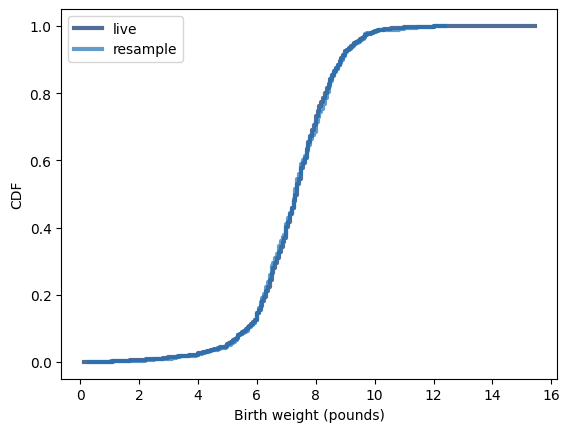

In [ ]:
resample = live_cdf.Sample(1000)

thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label="resample"))
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="CDF")

This confirms that the random sample has the same distribution as the original data.

##Exercises